KeyboardInterrupt: 

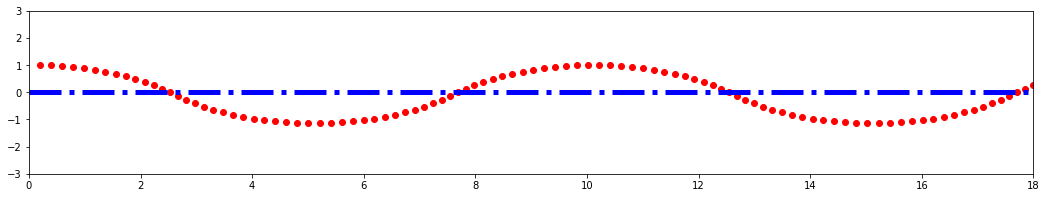

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
%matplotlib inline

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()
plt.figure(figsize=(18, 3))

class UGV_model:
    def __init__(self, x0, y0, theta0, L, v0, T): # L:wheel base
        self.x = x0 # X
        self.y = y0 # Y
        self.theta = theta0 # headding
        self.l = L  # wheel base
        self.v = v0  # speed
        self.dt = T  # decision time periodic
    def update(self, vt, deltat):  # update ugv's state
        dx = self.v*np.cos(self.theta)
        dy = self.v*np.sin(self.theta)
        dtheta = self.v*np.tan(deltat)/self.l
        self.x += dx*self.dt
        self.y += dy*self.dt
        self.theta += dtheta*self.dt
        
    def plot_duration(self):
        plt.scatter(self.x, self.y, color='r')   
        plt.axis([0, 18, -3, 3])
        if is_ipython:
            display.clear_output(wait=True)
            display.display(plt.gcf())  
'''
set reference trajectory
refer_path = np.zeros((100, 2))
refer_path[:,0] = np.linspace(0, 18, 100)


plt.plot(refer_path[:,0], refer_path[:,1], '-.b', linewidth=5.0)
ugv = UGV_model(0, 0, 0, 2.86, 2.0, 0.1)
for i in range(1000):
    ugv.update(2.0, np.cos(i/5.0))
    ugv.plot_duration()
'''    
 
#直接控制test    
'''   
from scipy.spatial import KDTree

# set reference trajectory
refer_path = np.zeros((1000, 2))
refer_path[:,0] = np.linspace(0, 1000, 1000)
# refer_path[:,1] = 5*np.sin(refer_path[:,0]/5.0) # generating sin reference trajectory
refer_tree = KDTree(refer_path) # reference trajectory
plt.plot(refer_path[:,0], refer_path[:,1], '-.b', linewidth=5.0)


# Initial: pos_x is 0, pos_y is 1.0 m, heading is 0 m, 
# wheelbase is 2.0 m,  speed is 2.0 m/s, decision period is 0.1s.
ugv = UGV_model(0, 1.0, 0, 2.0, 2.0, 0.1)   
pind = 0
ind = 0 
for i in range(1000):
    robot_state = np.zeros(2)
    robot_state[0] = ugv.x
    robot_state[1] = ugv.y
    _, ind = refer_tree.query(robot_state)
    if ind < pind: ind = pind
    else: pind = ind
        
    dist = np.linalg.norm(robot_state-refer_path[ind])
    dx, dy = refer_path[ind] - robot_state
    alpha = math.atan2(dy, dx)
    e = np.sign(np.sin(alpha-ugv.theta))*dist  # bang-bang controller
    delta = np.sign(e)*np.pi/6.0
    ugv.update(2.0, delta)
    ugv.plot_duration()
 '''   
class PID:
    def __init__(self, kp, ki, kd):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.ep = 0.0
        self.ei = 0.0
        self.ed = 0.0
        self.dt = 0.1
    def update_e(self, e):
        print(e)
        self.ed = e - self.ep
        self.ei += e
        self.ep = copy.deepcopy(e)
        
    def get_u(self):
        u = self.kp*self.ep+self.ki*self.ei+self.kd*self.ed
        if u > np.pi/6: u = np.pi/6        
        if u < -np.pi/6: u = -np.pi/6
        print(u)
        return u
    
    from scipy.spatial import KDTree

# set reference trajectory
refer_path = np.zeros((1000, 2))
refer_path[:,0] = np.linspace(0, 1000, 1000)
# refer_path[:,1] = 5*np.sin(refer_path[:,0]/5.0) # generating sin reference trajectory
refer_tree = KDTree(refer_path) # reference trajectory
plt.plot(refer_path[:,0], refer_path[:,1], '-.b', linewidth=5.0)


# Initial: pos_x is 0, pos_y is 1.0 m, heading is 0 m, 
# wheelbase is 2.0 m,  speed is 2.0 m/s, decision period is 0.1s.
ugv = UGV_model(0, 1.0, 0, 2.0, 2.0, 0.1)   
pind = 0
ind = 0 
for i in range(1000):
    robot_state = np.zeros(2)
    robot_state[0] = ugv.x
    robot_state[1] = ugv.y
    _, ind = refer_tree.query(robot_state)
    if ind < pind: ind = pind
    else: pind = ind
        
    dist = np.linalg.norm(robot_state-refer_path[ind])
    dx, dy = refer_path[ind] - robot_state
    alpha = math.atan2(dy, dx)
    e = np.sign(np.sin(alpha-ugv.theta))*dist  # bang-bang controller
    delta = np.sign(e)*np.pi/6.0
    ugv.update(2.0, delta)
    ugv.plot_duration()

    